# Pump curves and control

### Preliminary settings

Import the required python libs for this notebook



In [2]:
import numpy as np

import matplotlib.pyplot as plt

Define some settings to be compatible with colorblind people

In [3]:
import matplotlib.pyplot as plt

N = 6

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,N)))

linestyles = ['-','--','-.',':']

## Build a system curve

We generate a system curve from equation: $H_s=H_{geo}+K\cdot Q^2$.

$H_s$ is the head of the system curve [m] (as a function of Q)

$H_{geo}$ is the geodatic head [m]

$K_s$ is the loss coefficent that has been determined at the design point [-]

$Q$ is the volume flow rate [m³/s]

We will set $H_{geo}$ and $Q$ to initial values. 

__We will change them later to test their impact.__

In [4]:
H_geo = 3
K_s = 1000

The flow rate $Q$ is a vector of 100 values starting from 0 to 1 m³/s

In [5]:
Q = np.linspace(0,0.12,100, endpoint=True)

Now we set up the system curve: 

In [6]:
H_s = H_geo + K_s*Q**2

we can check the system curve in a diagramm

In [7]:
plt.figure(1)
plt.plot(Q, H_s, 'k', label='system curve')
plt.fill([0, np.max(Q),np.max(Q),0],[0,0, H_geo, H_geo], label='$H_{geo}$', alpha=0.25)
plt.fill_between(Q,np.ones(len(H_s))*H_geo, H_s, label='System losses ($K\cdot Q^2$)', alpha=0.25, color='grey')
plt.xlabel('Q [m³/s]')
plt.ylabel('H [m]')
plt.legend()
plt.tight_layout()

Now we define a pump curve: $H_p = H_{zero} - K_p\cdot Q^2$. You can usually get it from the pump manufacturer.

$H_p$ is the head of the pump [m] for a given flow rate $Q$

$H_{zero}$ is the shut off head [m] were the pump stops to transport the fluid due to the head.

$K_p$ is the pump coefficient to describe the pump curve.

In [8]:
H_zero = 15
K_p = 500

In [9]:
H_p = H_zero - K_p*Q**2

Now we can plot the pum curve with the system curve 

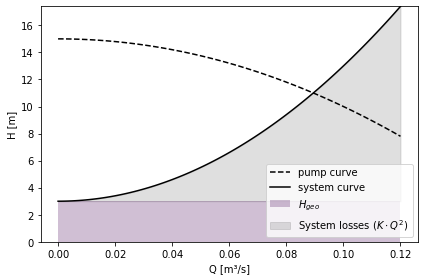

In [10]:
plt.figure(1)
plt.plot(Q, H_p, 'k--', label='pump curve')
plt.plot(Q, H_s, 'k', label='system curve')
plt.fill([0, np.max(Q),np.max(Q),0],[0,0, H_geo, H_geo], label='$H_{geo}$', alpha=0.25)
plt.fill_between(Q,np.ones(len(H_s))*H_geo, H_s, label='System losses ($K\cdot Q^2$)', alpha=0.25, color='grey')
plt.xlabel('Q [m³/s]')
plt.ylabel('H [m]')
plt.ylim(0,np.max(H_s))
plt.legend(loc='lower right')
plt.tight_layout()

The operating point is determined by equating the systems with the system characteristic curve and solving for $Q$ which gives $Q_{op}$. By inserting $Q_{op}$ in either system or pump curve one obtains $H_{op}$ the head of the operating point.

$H_p = H_s$

$H_{zero} - K_2\cdot Q^2  = H_{geo}+K\cdot Q^2$

$Q_{op} = (\frac{H_{zero}-H_{geo}}{K_s + K_p})^{0.5}$

$H_{op} =  H_{zero} - K_p\cdot Q_{op}^2$


In [11]:
Q_op = ((H_zero - H_geo)/(K_p + K_s))**0.5
H_op =  H_zero - K_p*Q_op**2

We can check the result with the intersection of the two curves in the diagramm:

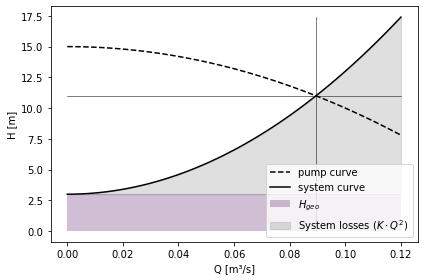

In [12]:
plt.figure(1)
plt.plot(Q, H_p, 'k--', label='pump curve')
plt.plot(Q, H_s, 'k', label='system curve')
plt.fill([0, np.max(Q),np.max(Q),0],[0,0, H_geo, H_geo], label='$H_{geo}$', alpha=0.25)
plt.fill_between(Q,np.ones(len(H_s))*H_geo, H_s, label='System losses ($K\cdot Q^2$)', alpha=0.25, color='grey')
plt.plot([Q_op,Q_op], [0,np.max(H_s)], 'k', linewidth=0.5 )
plt.plot([0,np.max(Q)], [H_op,H_op], 'k', linewidth=0.5 )

plt.xlabel('Q [m³/s]')
plt.ylabel('H [m]')
plt.legend(loc='lower right')
plt.tight_layout()

## Adjust the operating point

There are several ways to control an operating point. As a first possibility we will use a throttle. This means we close a valve to increase the pressure loss in the system curve ($K_s$ will increase).

To this purpose we will use a vector with increasing values of $K_s$

In [13]:
K_s = [1000, 1500, 2000, 2500]

the system curves change with increasing $K_s$: 

In [14]:
H_s = [H_geo + k_s*Q**2 for k_s in K_s] 

we can check the system curve in a diagramm

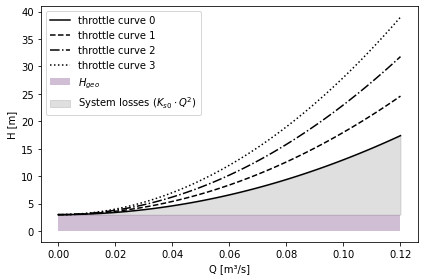

In [15]:
plt.figure(1)
for i,h_s in enumerate(H_s):
    plt.plot(Q, h_s, 'k', label='throttle curve %d' %i, linestyle=linestyles[i])
plt.fill([0, np.max(Q),np.max(Q),0],[0,0, H_geo, H_geo], label='$H_{geo}$', alpha=0.25)
plt.fill_between(Q,np.ones(len(H_s[0]))*H_geo, H_s[0], label='System losses ($K_{s0}\cdot Q^2$)', 
                 alpha=0.25, color='grey')
plt.xlabel('Q [m³/s]')
plt.ylabel('H [m]')
plt.legend()
plt.tight_layout()

In [16]:
plt.figure(1)
plt.plot(Q, H_p, 'k--', label='pump curve')
for i,h_s in enumerate(H_s):
    plt.plot(Q, h_s, 'k', label='throttle curve %d' %i, linestyle=linestyles[i])
plt.fill([0, np.max(Q),np.max(Q),0],[0,0, H_geo, H_geo], label='$H_{geo}$', alpha=0.25)
plt.fill_between(Q,np.ones(len(H_s[0]))*H_geo, H_s[0], label='System losses ($K_{s0}\cdot Q^2$)', 
                 alpha=0.25, color='grey')
plt.plot([Q_op,Q_op], [0,np.max(H_s)], 'k', linewidth=0.5 )
plt.plot([0,np.max(Q)], [H_op,H_op], 'k', linewidth=0.5 )
plt.plot(Q_op, H_op, 'o', 'r', label='operating point')
plt.xlabel('Q [m³/s]')
plt.ylabel('H [m]')
plt.legend()
plt.tight_layout()

We can see that the four system curves produce four intersections with the pump curve. Thes denote the new working points for the new system curves.

The throttle increses $H_{op}$ the head of the operation point, while the flow rate $Q_{op}$ decreases. We can recalculate the operation point

In [19]:
Q_op = ((H_zero - H_geo)/(K_p + K_s[3]))**0.5
H_op =  H_zero - K_p*Q_op**2

In [20]:
plt.figure(1)
plt.plot(Q, H_p, 'k--', label='pump curve')
for i,h_s in enumerate(H_s):
    plt.plot(Q, h_s, 'k', label='throttle curve %d' %i, linestyle=linestyles[i])
plt.fill([0, np.max(Q),np.max(Q),0],[0,0, H_geo, H_geo], alpha=0.25)
plt.fill_between(Q,np.ones(len(H_s[0]))*H_geo, H_s[0], alpha=0.25, color='grey')
plt.plot([Q_op,Q_op], [0,np.max(H_s)], 'k', linewidth=0.5 )
plt.plot([0,np.max(Q)], [H_op,H_op], 'k', linewidth=0.5 )
plt.plot(Q_op, H_op, 'o', 'r', label='operating point')
plt.xlabel('Q [m³/s]')
plt.ylabel('H [m]')
plt.legend()
plt.tight_layout()

We can see that a throttle only allows to __decrease the flow rate!__